In [1]:
#!pip install "dask[complete]"
#!pip install "napari[all]"

# Visualizations before preprocessing

In [2]:
import dask.array as da
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import napari
from napari.utils import nbscreenshot

In [3]:
# Finger inputs
finger = da.from_npy_stack(Path('..', 'data', 'Raw', 'CT Scans', 'index', 'S232028')).compute()
# Finger label
finger_label = da.from_npy_stack(Path('..', 'data', 'Raw', 'Labels', 'index', 'S232028')).compute()

In [4]:
print("Min:", np.min(finger))
# Max value is further out of range.
print("Max:", np.max(finger))
print("Unique values:", np.unique(finger)[:10])

Min: 21496
Max: 26418
Unique values: [21496 21505 21508 21512 21513 21514 21515 21521 21522 21524]


In [5]:
print(finger)

[[[21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  ...
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]]

 [[21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  ...
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]]

 [[21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  ...
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]]

 ...

 [[21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  [21704 21704 21704 ... 21704 21704 21704]
  ...
  [21704 21704 21704 ... 21704 21704 217

In [6]:
"""
0 -> Not bone
1 -> The proximal phalanx
2 -> The middle phalanx
3 -> The distal phalanx
"""
# Finger label values
a_slice = 0
# Grabs the first slice that doesn't contain all zeros and assigns it to a_slice.
for slice in finger_label:
    if np.any(slice != 0):
        a_slice = slice
        #print(slice)
        break
# Finds the first vector with not all zeros.
# A pixel value 3 is found which is considered part of the distal phalanx.
for vector in a_slice:
    if np.any(vector != 0):
        print(vector)
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [7]:
# CT scan for the finger
ct_scan = da.stack(finger, axis=1)
print("CT info for finger input:")
ct_scan

CT info for finger input:


dask.array<stack, shape=(604, 1081, 523), dtype=uint16, chunksize=(604, 1, 523), chunktype=numpy.ndarray>

In [8]:
# CT scan for the finger label
ct_scan_label = da.stack(finger_label, axis=0)
print("CT info for finger label:")
ct_scan_label

CT info for finger label:


dask.array<stack, shape=(604, 1081, 523), dtype=int64, chunksize=(1, 1081, 523), chunktype=numpy.ndarray>

# CT scan using napari

In [9]:
viewer = napari.Viewer()

In [10]:
# Visualize 
spacing = np.array([0.05, 0.05, 0.05])

# Displays the input values 
ct_scan_view = viewer.add_image(
    ct_scan,
    name='CT Scan Input',
    colormap='gray',
    scale=spacing
)
ct_scan_view.reset_contrast_limits()

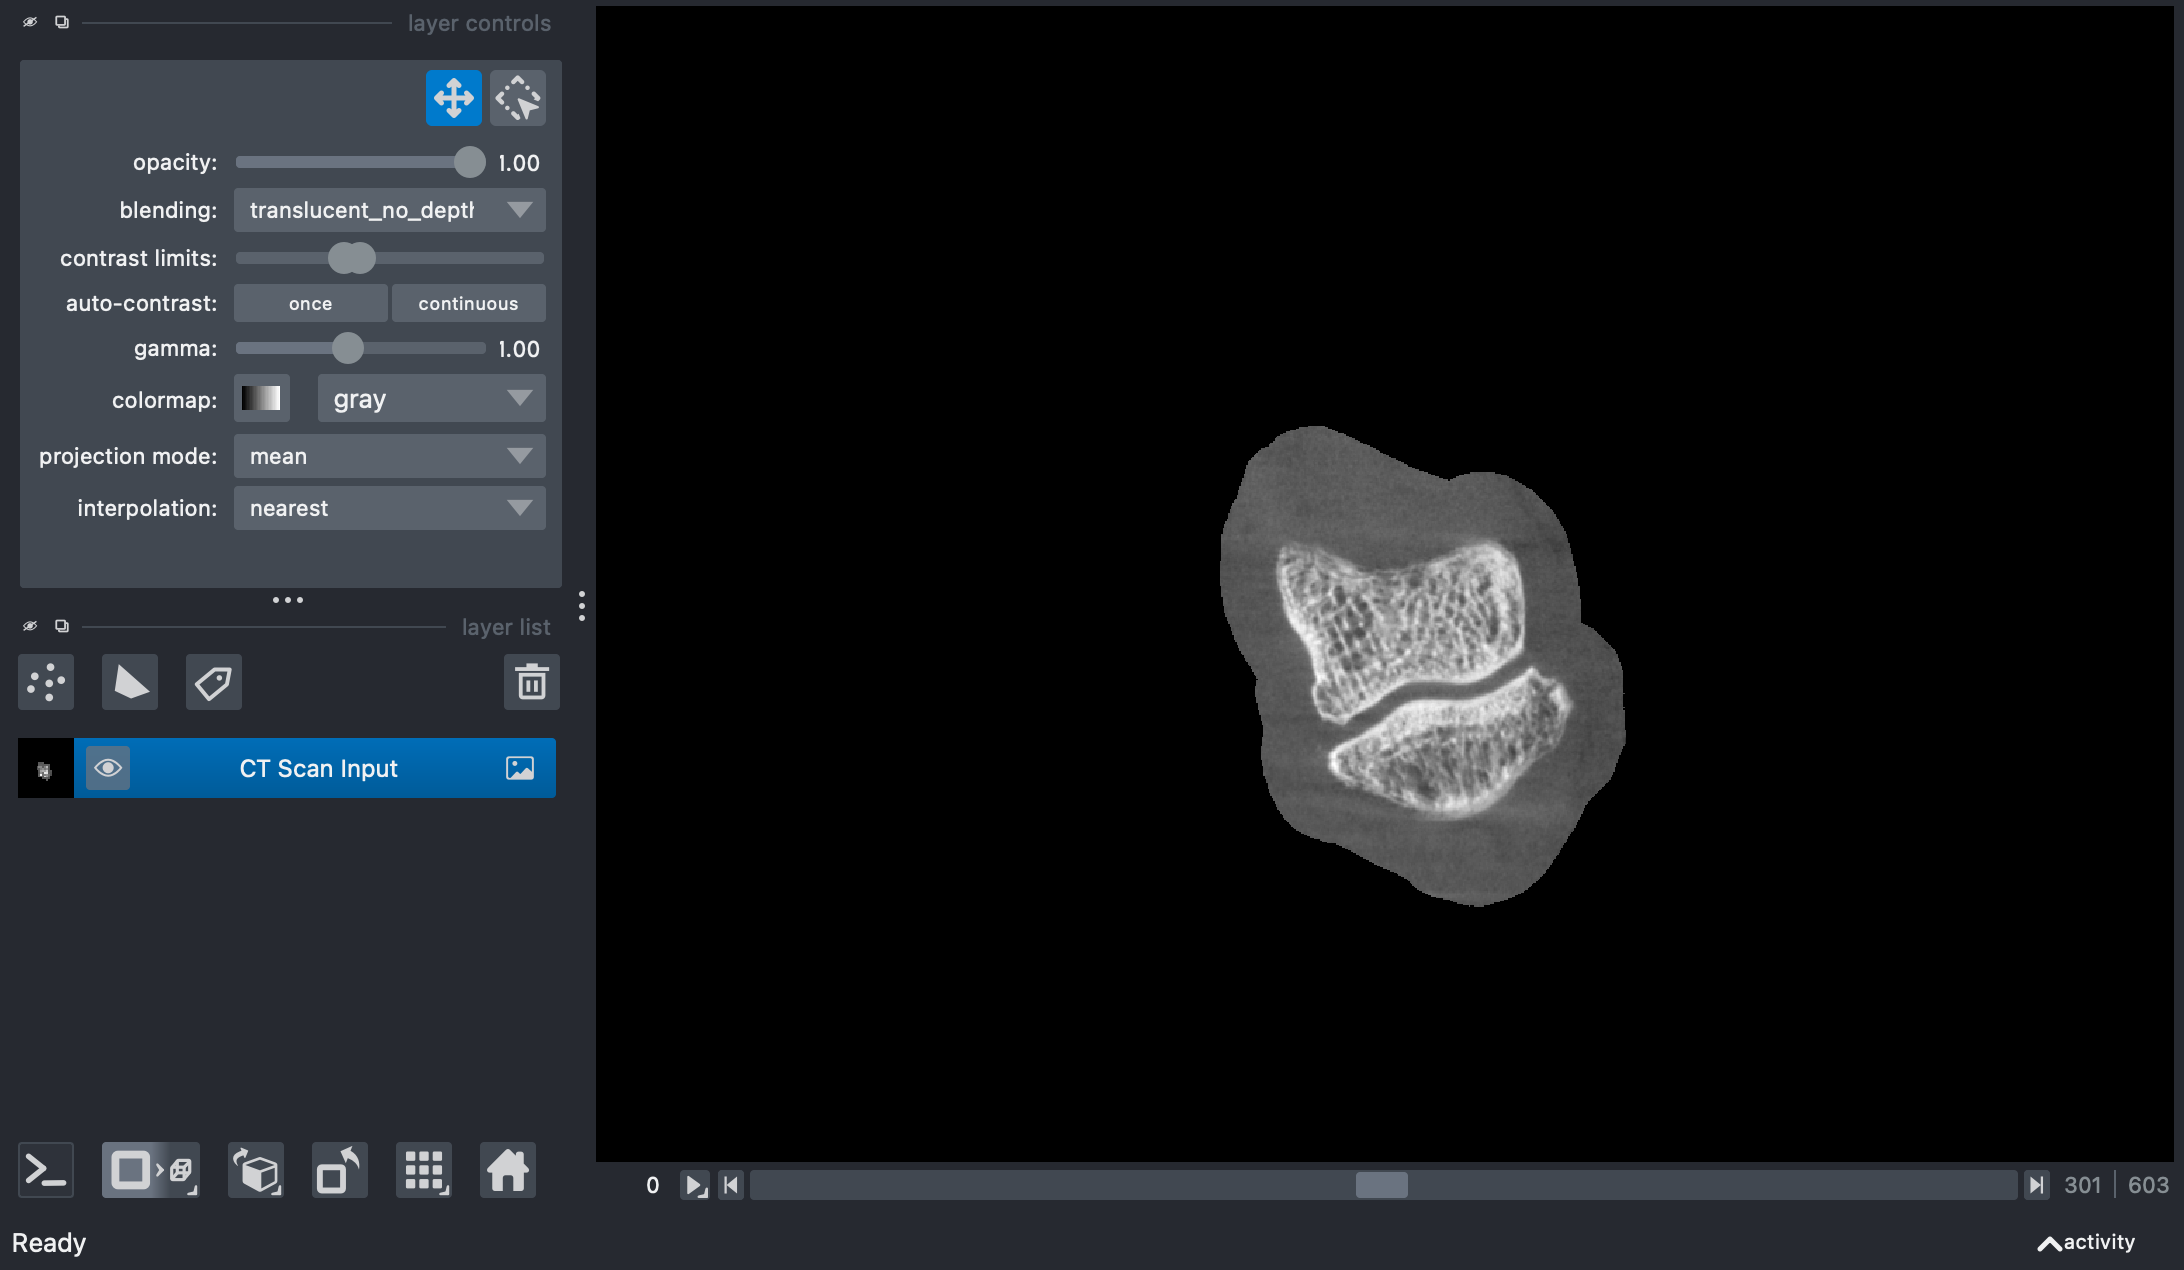

In [11]:
# CT Scan input
nbscreenshot(viewer)

In [12]:
spacing = np.array([0.05, 0.05, 0.05])

# Displays the labels on the CT scan
ct_scan_view_label = viewer.add_labels(
    finger_label,
    name='CT Scan Label',
    opacity=0.5,
    scale=spacing
)

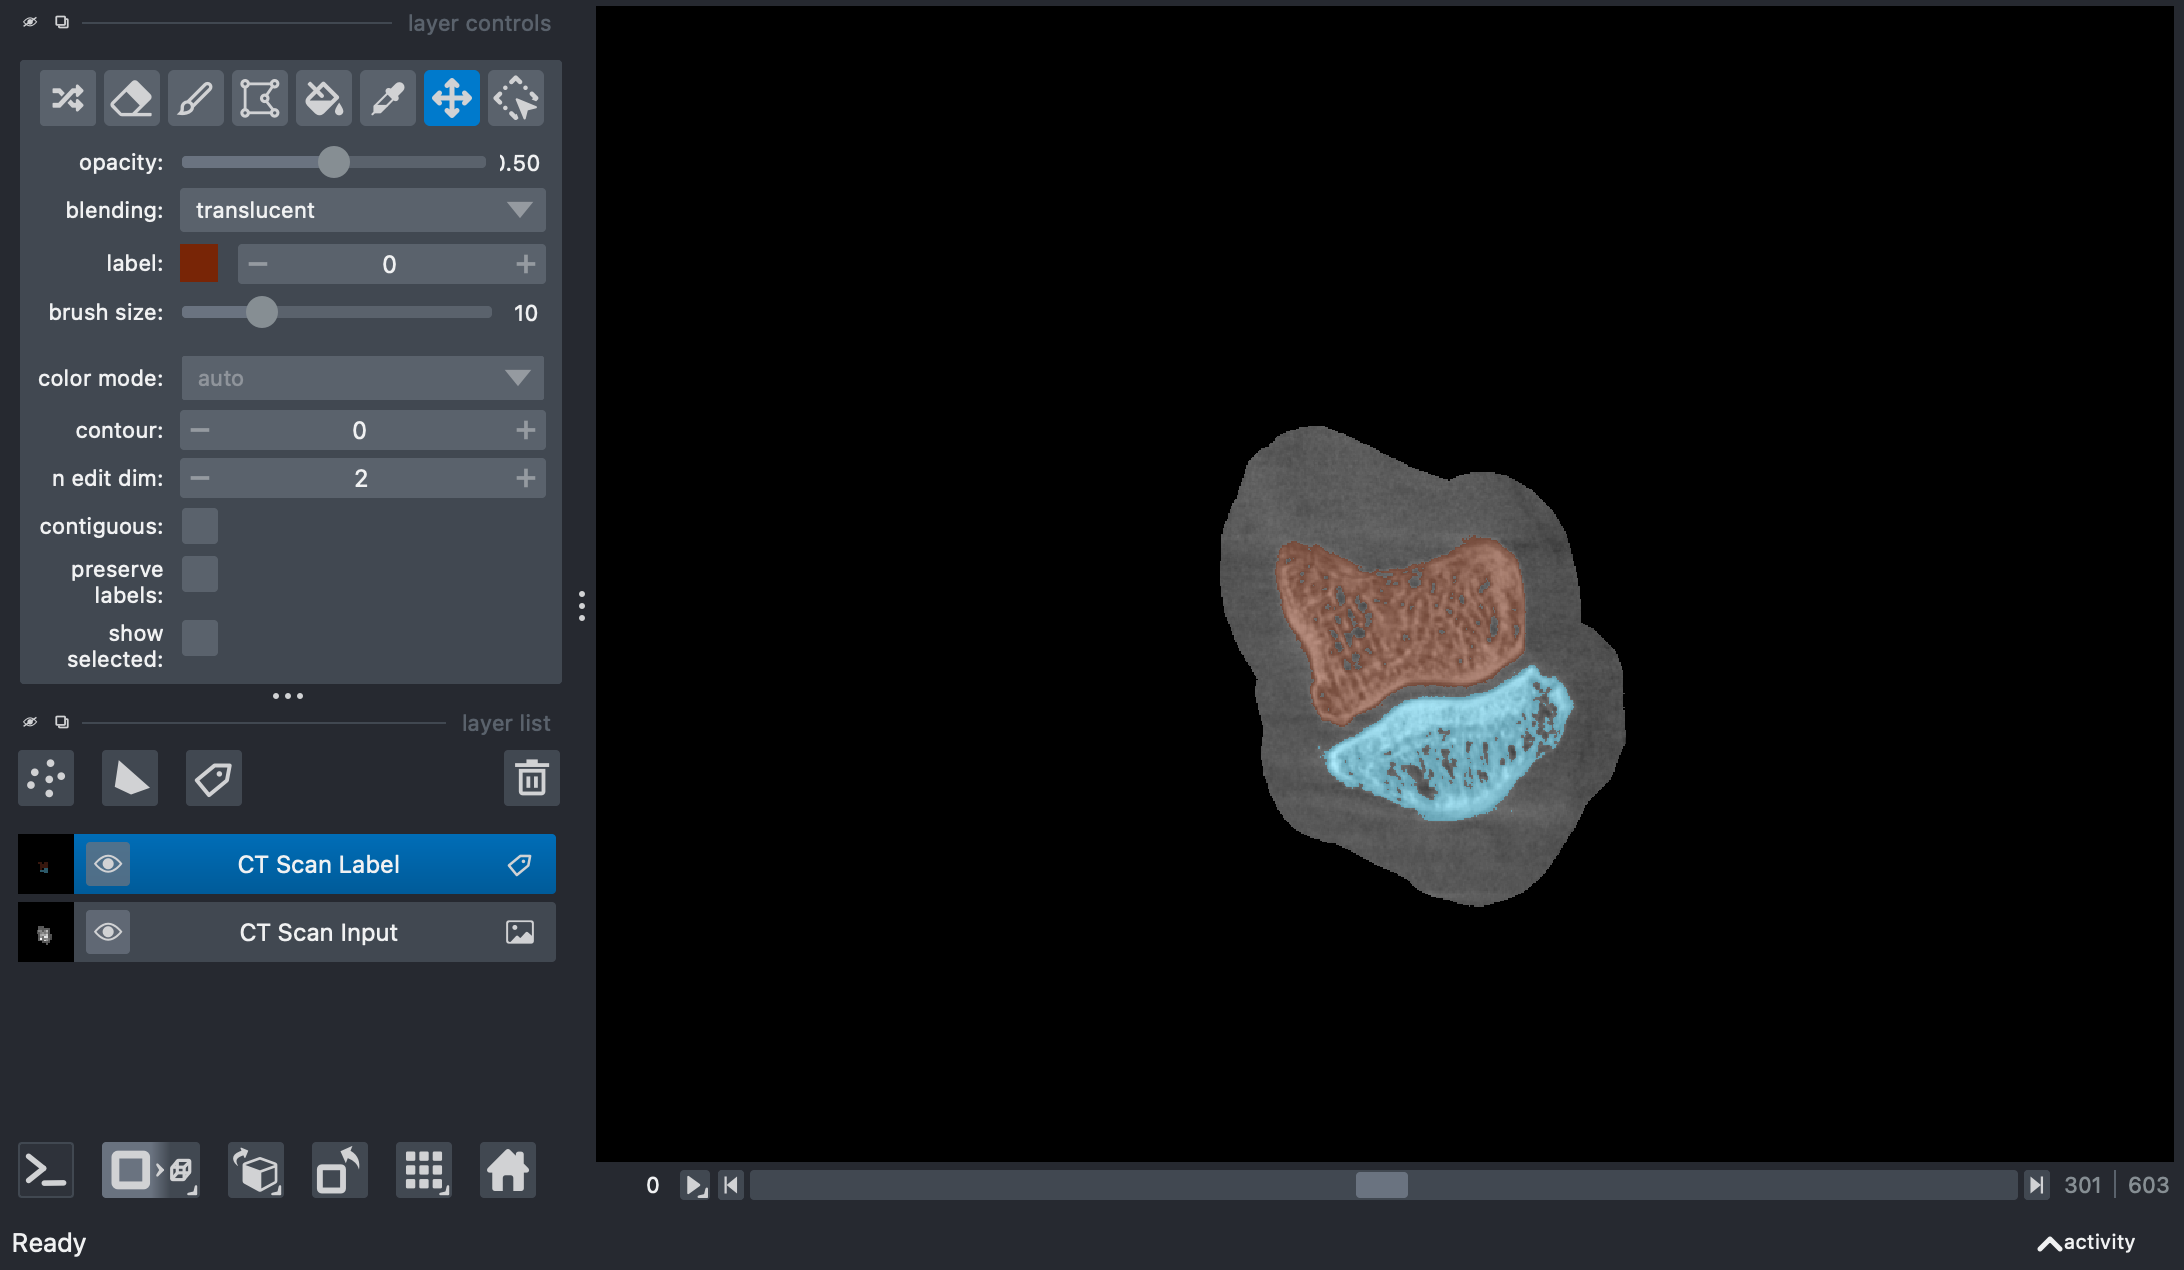

In [13]:
# CT scan segmentated
nbscreenshot(viewer)

# Visualizing slices

Input index 320th slice:


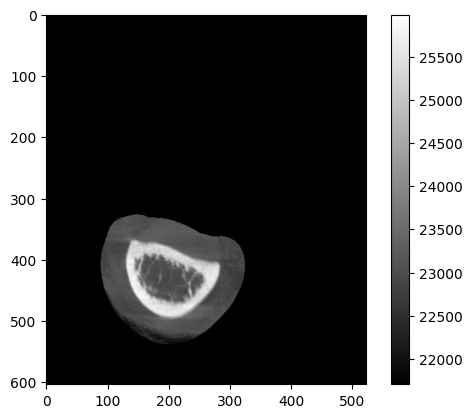

In [14]:
print("Input index 320th slice:")
plt.imshow(finger[320], cmap="gray")
plt.colorbar()
plt.show()

Label index 320th slice:


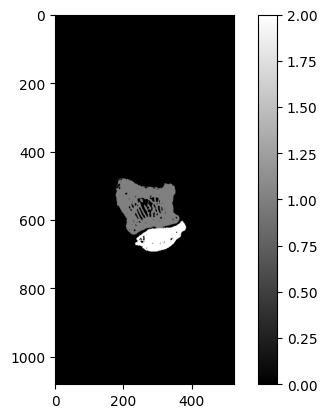

In [15]:
print("Label index 320th slice:")
plt.imshow(finger_label[320], cmap='gray')
plt.colorbar()
plt.show()